In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/suriya/dcu/Group-Project


In [3]:
import pandas as pd
import numpy as np
import os

from tqdm import tqdm
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

In [4]:
from src.featutils import aggregate_features_from_folder
from src.features.baseline import extract_features_from_file
from src.features.baseline import postproc_feature_dicts_unnormed
from src.features.baseline import get_unnormalized_predictors, TARGET

In [5]:
train_data_dir = 'data/tc4tl_training_data_v1/tc4tl/data/train/'
dev_data_dir = 'data/tc4tl_data_v5/tc4tl/data/dev/'
test_data_dir = 'data/tc4tl_data_v5/tc4tl/data/test/'
train_key = pd.read_csv('data/tc4tl_training_data_v1/tc4tl/docs/tc4tl_train_key.tsv', sep='\t')
dev_key = pd.read_csv('data/tc4tl_data_v5/tc4tl/docs/tc4tl_dev_key.tsv', sep='\t')
test_key = pd.read_csv('data/tc4tl_test_key/tc4tl/docs/tc4tl_test_key.tsv', sep='\t')

## Verify datapoint

In [6]:
trainset, enc = aggregate_features_from_folder(train_data_dir, train_key, feat_fn=extract_features_from_file,
                              postproc_fn=postproc_feature_dicts_unnormed, testing=True)

100%|██████████| 1000/1000 [01:39<00:00, 10.06it/s]


In [10]:
trainset['DistanceContinuous'] = trainset['Distance'].astype('float')

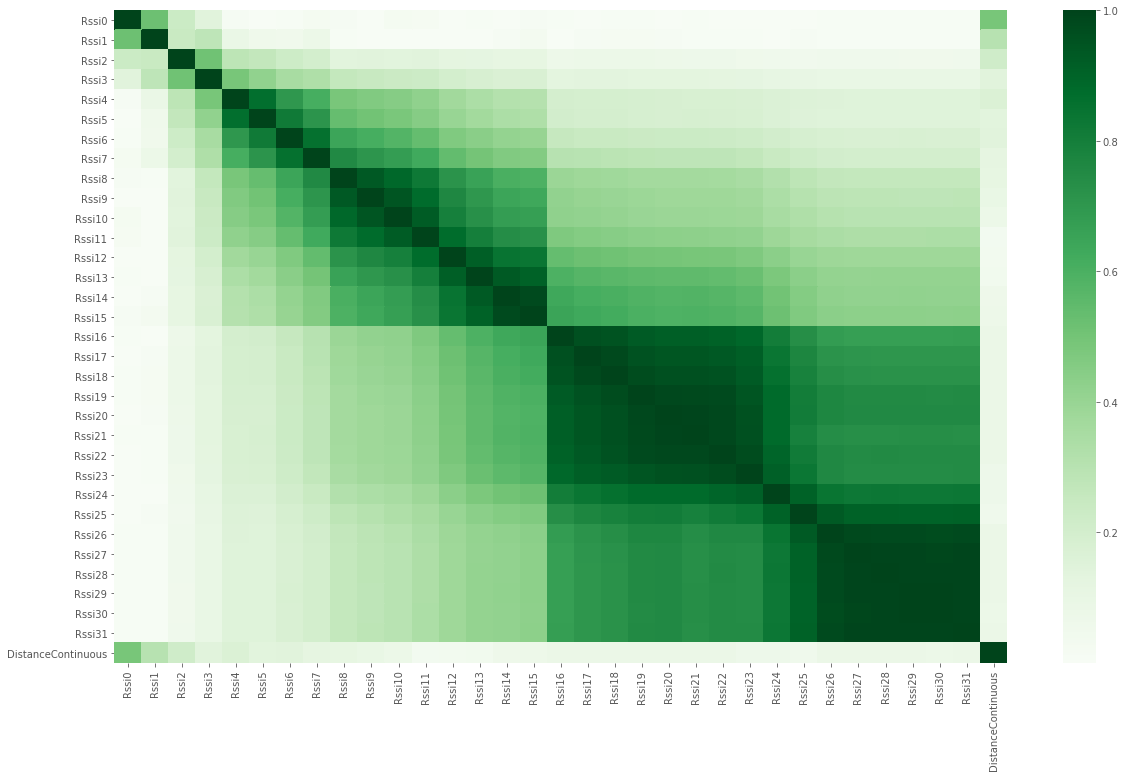

In [11]:
plt.figure(figsize=(20, 12))
sns.heatmap(trainset.corr().abs(), cmap='Greens');

In [17]:
devset, denc = aggregate_features_from_folder(dev_data_dir, dev_key, feat_fn=extract_features_from_file,
                              postproc_fn=postproc_feature_dicts_unnormed)

100%|██████████| 935/935 [01:28<00:00, 10.61it/s]


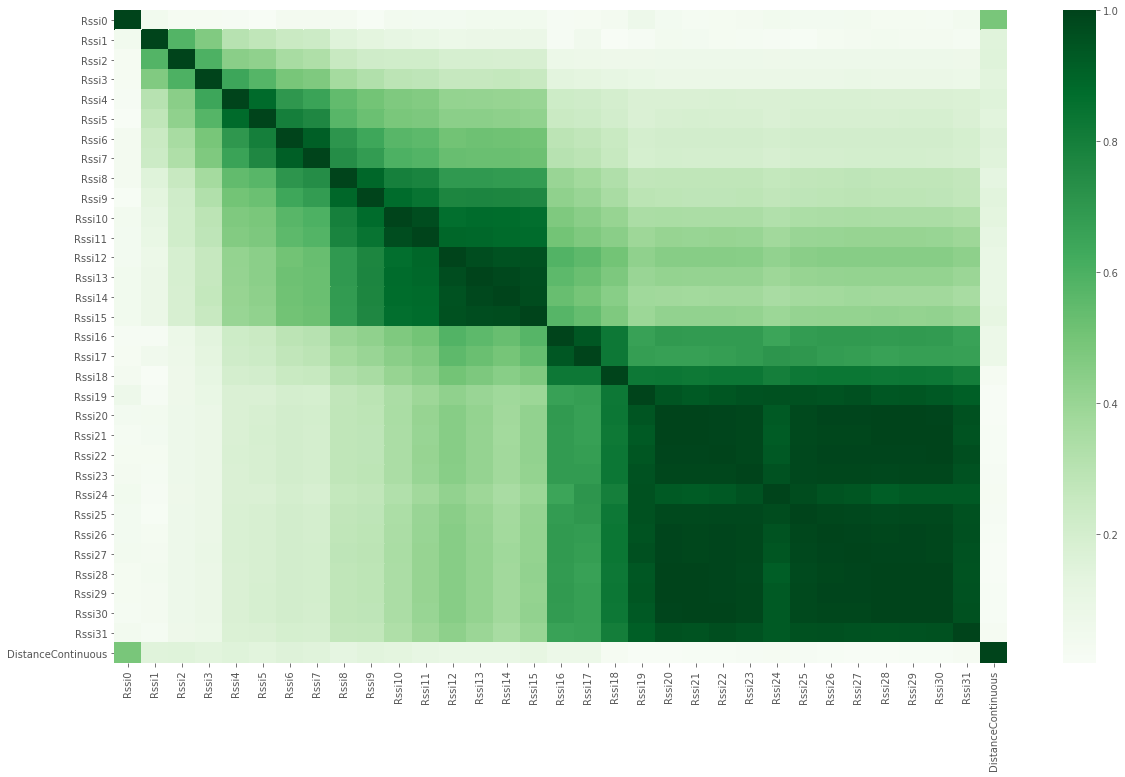

In [18]:
devset['DistanceContinuous'] = devset['Distance'].astype('float')
plt.figure(figsize=(20, 12))
sns.heatmap(devset.corr().abs(), cmap='Greens');

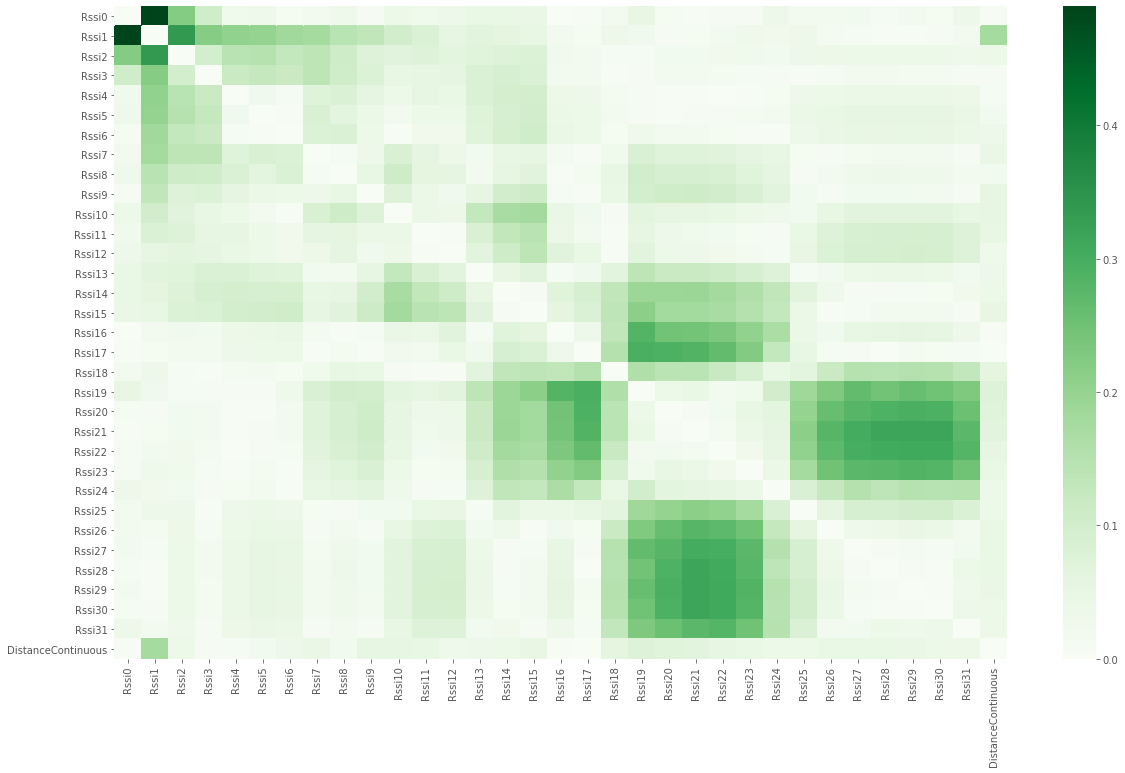

In [45]:
plt.figure(figsize=(20, 12))
trainset['DistanceContinuous'] = trainset['Distance'].astype('float')
devset['DistanceContinuous'] = devset['Distance'].astype('float')
sns.heatmap((devset.corr().abs() - trainset.corr().abs()).abs(), cmap='Greens');

## Create Training Set

In [19]:
trainset, enc = aggregate_features_from_folder(train_data_dir, train_key, feat_fn=extract_features_from_file,
                              postproc_fn=postproc_feature_dicts_unnormed)

100%|██████████| 15552/15552 [24:48<00:00, 10.44it/s]


In [21]:
trainset[trainset.isna().sum(axis=1) > 0]

,Rssi0,Rssi1,Rssi2,Rssi3,Rssi4,Rssi5,Rssi6,Rssi7,Rssi8,Rssi9,...,Rssi25,Rssi26,Rssi27,Rssi28,Rssi29,Rssi30,Rssi31,fileid,Distance,CoarseGrain


In [22]:
trainset.to_csv('data/processed/baseline.trainset.unnormed.csv', index=False)

In [24]:
trainset[['Rssi0', 'Rssi1', 'Rssi2', 'CoarseGrain', 'Distance']]

,Rssi0,Rssi1,Rssi2,CoarseGrain,Distance
0,-57.108571,-59.551515,-66.778481,Y,1.8
1,-49.692308,-59.250000,-62.500000,N,3.0
2,-52.284916,-75.274194,-55.357576,N,1.2
3,-64.377246,-62.309091,-67.566667,N,1.8
4,-57.166667,-56.482759,-53.840000,Y,1.8
...,...,...,...,...,...
15547,-58.988095,-66.542169,-54.675159,N,1.2
15548,-72.814516,-81.229299,-71.387931,N,4.5
15549,-71.535088,-64.310345,-61.985507,N,1.2
15550,-57.909722,-51.737705,-73.278571,Y,1.8


## Create Dev Set

In [25]:
devset, _ = aggregate_features_from_folder(dev_data_dir, dev_key, feat_fn=extract_features_from_file,
                              postproc_fn=postproc_feature_dicts_unnormed)

100%|██████████| 935/935 [01:28<00:00, 10.55it/s]


## Dual Evaluation

In [26]:
from src.models.base import dual_evaluation

In [31]:
predictors = get_unnormalized_predictors(trainset)
predictors, TARGET

(['Rssi0',
  'Rssi1',
  'Rssi2',
  'Rssi3',
  'Rssi4',
  'Rssi5',
  'Rssi6',
  'Rssi7',
  'Rssi8',
  'Rssi9',
  'Rssi10',
  'Rssi11',
  'Rssi12',
  'Rssi13',
  'Rssi14',
  'Rssi15',
  'Rssi16',
  'Rssi17',
  'Rssi18',
  'Rssi19',
  'Rssi20',
  'Rssi21',
  'Rssi22',
  'Rssi23',
  'Rssi24',
  'Rssi25',
  'Rssi26',
  'Rssi27',
  'Rssi28',
  'Rssi29',
  'Rssi30',
  'Rssi31'],
 'Distance')

In [69]:
report, system_output = dual_evaluation(trainset, devset, predictors, target=TARGET)

In [70]:
print(report['cg=Y'])

              precision    recall  f1-score   support

         1.8       0.61      0.66      0.63       137
         4.5       0.68      0.63      0.66       159

    accuracy                           0.65       296
   macro avg       0.65      0.65      0.64       296
weighted avg       0.65      0.65      0.65       296



In [71]:
print(report['cg=N'])

              precision    recall  f1-score   support

         1.2       0.42      0.46      0.44       153
         1.8       0.26      0.24      0.25       152
         3.0       0.30      0.25      0.27       175
         4.5       0.38      0.45      0.41       159

    accuracy                           0.35       639
   macro avg       0.34      0.35      0.34       639
weighted avg       0.34      0.35      0.34       639



In [73]:
!python3 evaluation/submission_scorer.py -o data/system_output/dev_system_output.tsv -l data/tc4tl_data_v5/tc4tl/docs/tc4tl_dev_trials.tsv -r data/tc4tl_data_v5/tc4tl/docs/tc4tl_dev_key.tsv

Subset		D	P_miss	P_fa	nDCF
fine_grain	1.20	0.54	0.20	0.74
fine_grain	1.80	0.34	0.31	0.65
fine_grain	3.00	0.24	0.55	0.79
coarse_grain	1.80	0.34	0.37	0.71


## Evaluate on Train Set split

In [54]:
from sklearn.model_selection import train_test_split
from src.models.base import evaluate, fit_rf

X_train, X_test, y_train, y_test = train_test_split(trainset[predictors], trainset[TARGET])
rf = fit_rf(X_train, y_train)
report = evaluate(rf, X_test, y_test)

In [56]:
print(report)

              precision    recall  f1-score   support

         1.2       0.88      0.80      0.84       629
         1.8       0.82      0.90      0.86      1312
         3.0       0.84      0.71      0.77       619
         4.5       0.89      0.89      0.89      1328

    accuracy                           0.85      3888
   macro avg       0.85      0.83      0.84      3888
weighted avg       0.85      0.85      0.85      3888



## Evaluate on test set

In [36]:
testset, _ = aggregate_features_from_folder(test_data_dir, test_key, feat_fn=extract_features_from_file,
                              postproc_fn=postproc_feature_dicts_unnormed)

100%|██████████| 8423/8423 [12:33<00:00, 11.17it/s]


In [37]:
testset.to_csv('data/processed/baseline.testset.unnormed.csv', index=False)

In [63]:
report, system_output = dual_evaluation(trainset, testset, predictors, target=TARGET)

In [64]:
print(report['cg=Y'])

              precision    recall  f1-score   support

         1.8       0.67      0.75      0.71      1423
         4.5       0.71      0.62      0.66      1401

    accuracy                           0.69      2824
   macro avg       0.69      0.68      0.68      2824
weighted avg       0.69      0.69      0.68      2824



In [65]:
print(report['cg=N'])

              precision    recall  f1-score   support

         1.2       0.43      0.44      0.44      1407
         1.8       0.30      0.27      0.28      1408
         3.0       0.27      0.27      0.27      1385
         4.5       0.35      0.38      0.36      1399

    accuracy                           0.34      5599
   macro avg       0.34      0.34      0.34      5599
weighted avg       0.34      0.34      0.34      5599



In [66]:
system_output

,fileid,distance
0,aaafrwlt_tc4tl20.csv,1.8
1,aaasqzop_tc4tl20.csv,4.5
2,aabadzsd_tc4tl20.csv,4.5
3,aacevzem_tc4tl20.csv,1.8
4,aacjnxug_tc4tl20.csv,4.5
...,...,...
8418,zztewylg_tc4tl20.csv,4.5
8419,zzugwnar_tc4tl20.csv,1.2
8420,zzvyzfce_tc4tl20.csv,1.8
8421,zzxbttvp_tc4tl20.csv,4.5


In [74]:
0.74 + 0.87 + 0.86 + 0.62

3.09

In [75]:
0.69 + 0.83 + 0.9 + 0.81

3.23

In [78]:
trainset[[col for col in trainset.columns if 'Rssi' in col ]].loc[0]

Rssi0    -57.108571
Rssi1    -59.551515
Rssi2    -66.778481
Rssi3    -54.696429
Rssi4    -53.888060
Rssi5    -68.899371
Rssi6    -65.414966
Rssi7    -59.243523
Rssi8    -63.800000
Rssi9    -60.084337
Rssi10   -74.664557
Rssi11     0.000000
Rssi12     0.000000
Rssi13     0.000000
Rssi14     0.000000
Rssi15     0.000000
Rssi16     0.000000
Rssi17     0.000000
Rssi18     0.000000
Rssi19     0.000000
Rssi20     0.000000
Rssi21     0.000000
Rssi22     0.000000
Rssi23     0.000000
Rssi24     0.000000
Rssi25     0.000000
Rssi26     0.000000
Rssi27     0.000000
Rssi28     0.000000
Rssi29     0.000000
Rssi30     0.000000
Rssi31     0.000000
Name: 0, dtype: float64